# Purpose of Notebook

The purpose of this notebook is to offer as a an example answer to the Guided Project for Linear Regression in Python course. Since the choice of model predictors is up to the student, results can differ. Use this solution as a guide to how to structure your own answer.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
# Load in the insurance dataset
insurance = pd.read_csv("insurance.csv")

# Exploring The Dataset

In [3]:
# Columns in the dataset
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

The `charges` column is our outcome, while everything else are the potential predictors to use in the model

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf38c164d0>]],
      dtype=object)

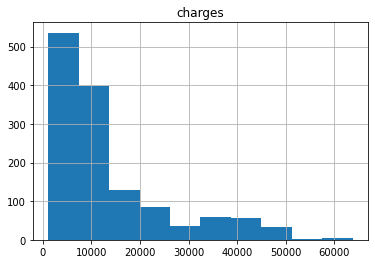

In [4]:
insurance.hist("charges")

The `charges` column is highly skewed to the right. Extremely costly insurance charges are more common than extremely small ones. This makes it unlikely that the errors in the model will truly be centered at zero. It might be worth it to log-transform the outcome.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf38b11ad0>]],
      dtype=object)

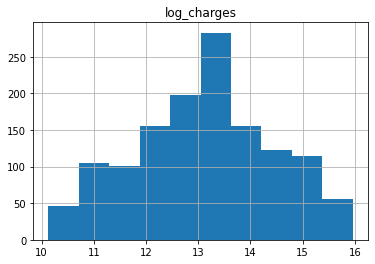

In [5]:
insurance["log_charges"] = np.log2(insurance["charges"])

insurance.hist("log_charges")

The log-transformed `charges` values are more centered, which is what we wanted. This makes it more likely that the errors will be unbiased.

In [6]:
# Checking the correlation between the continuous columns in the insurance data
insurance.corr()

,age,bmi,children,charges,log_charges
age,1.000000,0.109272,0.042469,0.299008,0.527834
bmi,0.109272,1.000000,0.012759,0.198341,0.132669
children,0.042469,0.012759,1.000000,0.067998,0.161336
charges,0.299008,0.198341,0.067998,1.000000,0.892964
log_charges,0.527834,0.132669,0.161336,0.892964,1.000000


## Comments on correlation

`age` has 30% correlation with `charges`, `bmi` has 19.8% correlation, and number of children has 6.7% correlation.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


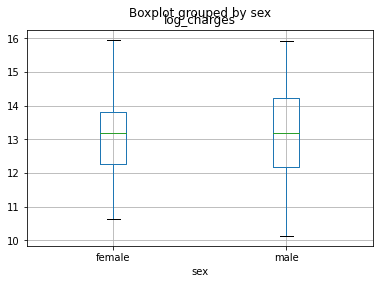

In [7]:
insurance.boxplot(column = ["log_charges"], by = "sex")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


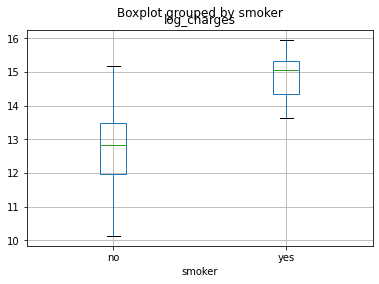

In [8]:
insurance.boxplot(column = ["log_charges"], by = "smoker")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


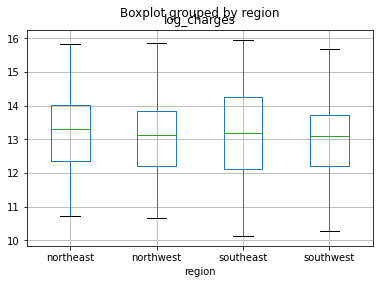

In [9]:
insurance.boxplot(column = ["log_charges"], by = "region")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


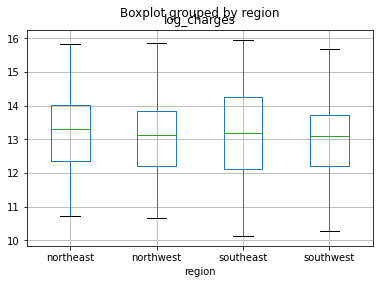

In [10]:
insurance.boxplot(column = ["log_charges"], by = "region")

## Comments on plots

Males seem to have a wider distribution of charges compared to women. Smokers have much higher costs than non-smokers. There doesn't seem tobe many appreciable differences between regions. 

# Dividing The Data

Based on the univariate relationships shown above, `age`, `bmi` and `smoker` are positively associated with higher `charges`. We'll include these predictors in our final model.

In [11]:
# Splitting the data up into a training and test set
insurance["is_smoker"] = (insurance["smoker"] == "yes")
X = insurance[["age", "bmi", "is_smoker"]]
y = insurance["log_charges"]

# 75% for training set, 25% for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    random_state = 1)

# Build The Model

In [12]:
# Training and checking model performance on training set
insurance_model = LinearRegression()
insurance_model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Get predicted values by model
y_pred = insurance_model.predict(X_train)

# MSE on the log scale for the insurance charges
mean_squared_error(y_train, y_pred)

0.4546665339270644

In [14]:
# MSE on the original scale for the insurance charges
np.exp(mean_squared_error(y_train, y_pred))

1.575647870310887

In [15]:
# Coefficient of determination
r2_score(y_train, y_pred)

0.7421118855283421

## Comments

The training MSE for the model is 0.454 and is 1.57 on the original scale. The $R^2$ indicates that the model can explain 74% of the variation in the log-insurance charges. These preliminary results are promising, but we must remember that these are optimistic values.

# Residual Diagnostics

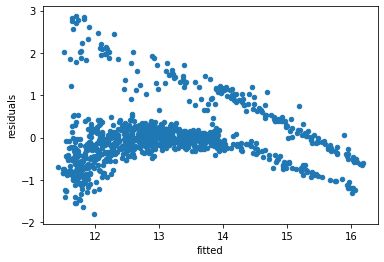

In [16]:
# Quick visual check of residuals
check = pd.DataFrame()
check["residuals"] = y_train - y_pred
check["fitted"] = y_pred

check.plot.scatter(x = "fitted", y = "residuals")

The residuals suggest some violations to the assumptions of linear regression. As fitted values get larger, the residuals trend downward. We expect an even band, centered around zero. This does not necessarily make the model predictions unusable, but it puts into question the linear regression assumptions.

# Interpreting The Model

In [17]:
# Getting the non-intercept coefficients
insurance_model.coef_

array([0.04892865, 0.01523672, 2.23063344])

- A year increase in the subject is associated with a 0.04 increase in the log charges, holding smoking status and bmi constant. About a 4% increase in the charges on the regular scale.
- A unit increase in the subject BMI is associated with a 0.01 increase in the log charges, holding smoking status and age constant.  About a 1.5% increase in the charges on the regular scale.
- A smoker is associated with a 2.23 increase in the log charges, holding age and bmi constant. About a 930% increase in the charges on the regular scale.

Note: we are not concerned about if these changes are *statistically significant*, so we don't know if these associations are truly non-zero. Our primary goal is prediction.

# Final Model Evaluation

In [18]:
# Getting MSE on test model
test_pred = insurance_model.predict(X_test)

mean_squared_error(y_test, test_pred)

0.4355350875308211

In [20]:
# Putting the outcome (in log-terms) back into the original scale
np.exp(mean_squared_error(y_test, test_pred))

1.545789970635098

# Drawing Conclusions

The test MSE was about 0.435, while the training MSE was about 0.454. In this case, the two errors match up pretty well, so we can conclude that the model is not overfit. The residuals suggest that the model is predicting much lower costs for subjects who were actually charged much higher. Therefore the model struggles with these higher costs. As a whole, the model predictions are too conservative. 

We might improve the model by including more complex terms in the regression, such as interactions or quadratic terms. 